In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Prepare Data 

In [5]:
data = pd.read_csv(r"C:\ML-- Dev\notebook\data\stud.csv")


In [6]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
numerical_cols = []
catagorical_cols = []

for i in data.columns:
    if data[i].dtype == 'int64':
        numerical_cols.append(i)
    else:
        catagorical_cols.append(i)


In [11]:
for col in catagorical_cols:
  print(f"{col}: ",data[col].unique(),end="\n \n")

gender:  ['female' 'male']
 
race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
 
parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 
lunch:  ['standard' 'free/reduced']
 
test_preparation_course:  ['none' 'completed']
 


In [12]:
data["total_score"] = data['reading_score']+data['writing_score']+data['math_score']
data['average'] = data['total_score']/3 
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


Visualization(Numerical variables)


In [13]:
# Uni-variate Graphs 

import plotly.express as px


data['gender'] = pd.Categorical(data['gender'], categories=['female', 'male'], ordered=True)
fig = px.histogram(data, x=['average', 'total_score'], marginal='rug',
                   color='gender', facet_col='variable',
                   labels={'value': 'Score', 'variable': 'Variable', 'gender': 'Gender'},
                   title='Distribution of Average and Test Score by Gender',
                   nbins=30)

fig.update_layout(height=500, width=1000)

# Show the plot
fig.show()



<AxesSubplot:xlabel='gender', ylabel='count'>

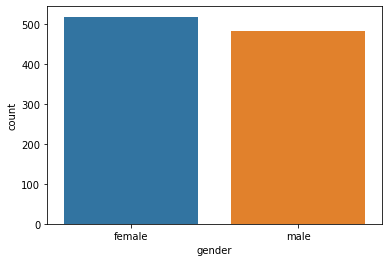

In [14]:
sns.countplot(data = data, x = 'gender')

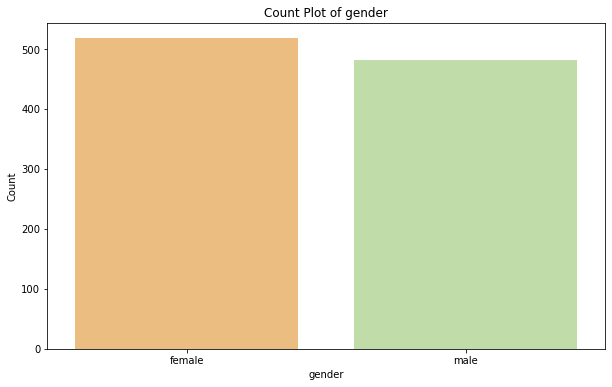

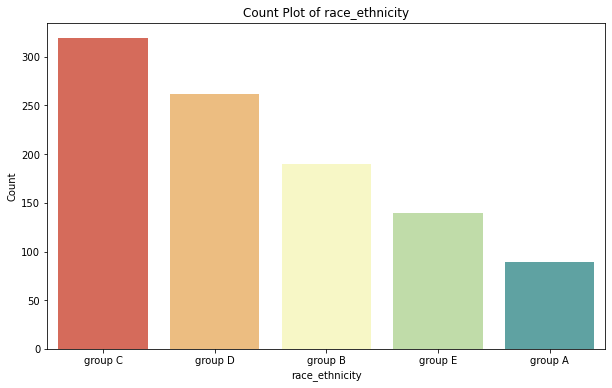

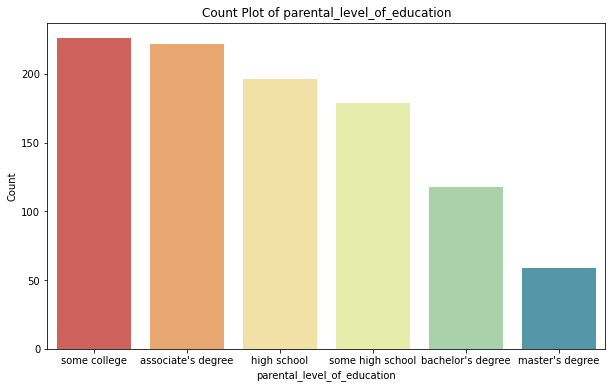

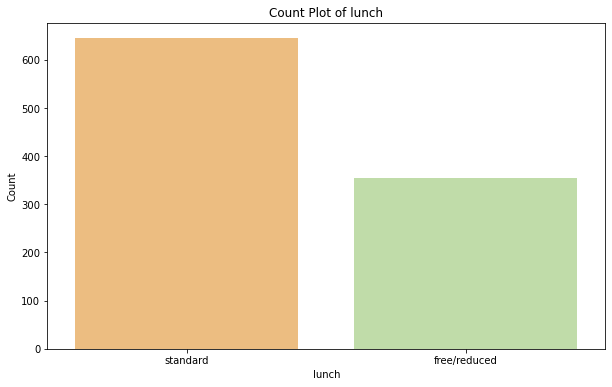

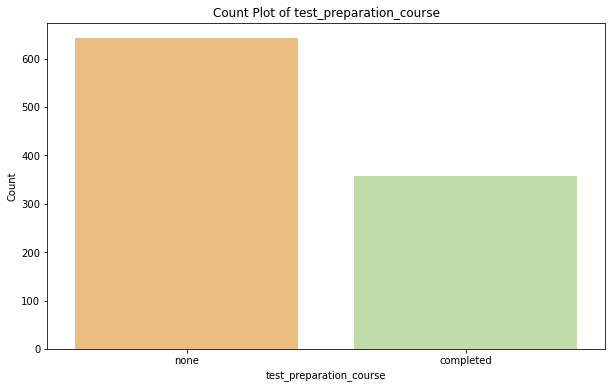

In [15]:
for cat_var in catagorical_cols:
    # ordered by the number of values 
    order = data[cat_var].value_counts().index

    plt.figure(figsize=(10, 6))  
    sns.countplot(x=cat_var, data=data, palette='Spectral', order=order) 

    plt.title(f'Count Plot of {cat_var}')
    plt.xlabel(f'{cat_var}')
    plt.ylabel('Count')

    # Show the plot
    plt.show()

Bi-variate Visualization


In [16]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
# Total score VS other variables 

px.box(data, x = 'race_ethnicity', y = 'total_score')

In [18]:
px.box(data, x = 'parental_level_of_education', y = 'total_score', color= "test_preparation_course")

In [19]:
px.box(data, x = 'lunch', y = 'total_score')

In [20]:
px.box(data, x = 'test_preparation_course', y = 'total_score')

In [21]:
px.box(data, x = 'test_preparation_course', y = 'total_score', color= 'gender')

In [22]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
# test prep vs test score 

px.box(data, x = 'total_score', y = 'test_preparation_course', color= 'gender')

In [24]:
px.box(data, x = 'total_score', y = 'lunch', color= 'gender')

In [70]:
my_order = data.groupby('race_ethnicity')['total_score'].mean()


px.box(data, x = 'total_score', y = 'race_ethnicity', 
       category_orders={'race_ethnicity': my_order})

In [26]:
px.box(data, x = 'total_score', y = 'race_ethnicity', color = "test_preparation_course")

In [44]:
# import plotly.graph_objects as go

# import plotly.graph_objects as go

# x_values = data["math_score"]
# y_values1 = data["writing_score"]
# y_values2 = data["reading_score"]

# # Create traces for each scatter plot
# trace1 = go.Scatter(x=x_values, y=y_values1, mode='markers', name='Reading Score')
# trace2 = go.Scatter(x=x_values, y=y_values2, mode='markers', name='Writing Score')

# # Create the figure
# fig = go.Figure(data=[trace1, trace2])

# # Update layout if needed
# fig.update_layout(title='Scatter Plot', xaxis_title='Math Score', yaxis_title='Score')

# # Show the plot
# fig.show()

fig = px.scatter(data,
                 x = 'writing_score',
                 y = 'reading_score',
                 color = 'gender', 
                 template = 'plotly_dark'
                 )

fig.show()



In [48]:
fig = px.histogram(data, x="writing_score", y="reading_score", color="gender", marginal="box",
                   hover_data=data.columns)
fig.show()

Insights

Female sutdents perform better than male students in all catagories 

students who took test prep score better on test 

group 3 has better test score 

standard lunch students have a much better scores 
Parents of students who has higher score has a min of Masters degree 


In [28]:
import seaborn as sns


<AxesSubplot:xlabel='total_score', ylabel='test_preparation_course'>

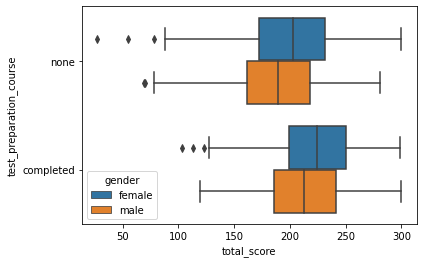

In [53]:
sns.boxplot(x= data['total_score'], y= data['test_preparation_course'], data=data, hue= 'gender')


In [50]:
catagorical_cols

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']